# Resume Parsing

## 1. Load data

In [1]:
import pandas as pd
import numpy as np
import pickle

df_resume = pd.read_csv("./data/resume.csv")

In [2]:
df_resume.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [3]:
df_resume.shape

(2484, 4)

In [4]:
df_resume = df_resume.reindex(np.random.permutation(df_resume.index))
df_resume = df_resume.copy().iloc[:1000, ]
df_resume.shape

(1000, 4)

## 2. Load skill data

If we define patterns for all the skill, we gonna be too tired.

So spacy knows that, so it allows you to give you a list of words, then it will automatically create pattern.

In [5]:
import spacy

nlp = spacy.load('en_core_web_md')
skill_path = './data/skills.jsonl'

In [6]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [7]:
doc = nlp("Chaky loves deep learning.")
doc.ents

(Chaky, deep learning)

## 3. Let's try to extract skills from this resume.csv

In [8]:
df_resume.head()

,ID,Resume_str,Resume_html,Category
1653,22249155,EMBROIDERY MACHINE OPERATOR Sum...,"<div class=""fontsize fontface vmargins hmargin...",APPAREL
1264,62700506,DIGITAL CONSULTANT Summary ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA
2024,29061628,CUSTOMER SERVICE REPRESENTATIVE ...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION
823,35302620,BRANCH MANAGER Summary Mor...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS
732,75744306,CUSTOMER SERVICE REPRESENTATIVE ...,"<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE


In [9]:
#clean our data
from spacy.lang.en.stop_words import STOP_WORDS

def preprocessing(sentence):
    stopwords    = list(STOP_WORDS)
    doc          = nlp(sentence)
    clean_tokens = []
    
    for token in doc:
        if token.text not in stopwords and token.pos_ != 'PUNCT' and token.pos_ != 'SYM' and \
            token.pos_ != 'SPACE':
                clean_tokens.append(token.lemma_.lower().strip())
                
    return " ".join(clean_tokens)

In [10]:
random_resume = df_resume.Resume_str.iloc[5]
random_resume[:300]

'         CHEF         Summary     Focused Operations Manager successful in contract negotiation and process improvement. Remains calm and poised even in high-pressure situations. Leverages in-depth knowledge of industry trends and shifts to offer valuable insights on opportunities for new growth and'

In [11]:
preprocessing(random_resume[:300])

'chef summary focused operations manager successful contract negotiation process improvement remain calm poise high pressure situation leverage depth knowledge industry trend shift offer valuable insight opportunity new growth'

In [12]:
for i, row in df_resume.iterrows():
    clean_text = preprocessing(row.Resume_str)
    df_resume.at[i, 'Clean_resume'] = clean_text

C:\Users\sung2_8l7o06c\AppData\Local\Temp\ipykernel_16292\1721952070.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'embroidery machine operator summary to find employment good reputable company chance advance good ability job skill skill customer service cashier pharmacy sales associate embroidery machine operator sewing machine operator telephone/ fax mahcines filing/ office skill skill customer service jc penney goodies medisav pharmacy wal - mart pharmacy the pharmacy pocola sale assiocate jc penney goodies medisav pharmacy wal - mart pharmacy the pharmacy pocola office skill telephone fax machine filing copier customer service advanced problem solve great people skill great organizational skill experience 01/2014 current embroidery machine operator company name － city state embroider shirt jacket hat item need meet incoming customer provide immediate assistance complete purchase cash credit debit payment m

In [13]:
df_resume.head()

,ID,Resume_str,Resume_html,Category,Clean_resume
1653,22249155,EMBROIDERY MACHINE OPERATOR Sum...,"<div class=""fontsize fontface vmargins hmargin...",APPAREL,embroidery machine operator summary to find em...
1264,62700506,DIGITAL CONSULTANT Summary ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,digital consultant summary i seek position con...
2024,29061628,CUSTOMER SERVICE REPRESENTATIVE ...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION,customer service representative present accomp...
823,35302620,BRANCH MANAGER Summary Mor...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS,branch manager summary more 5 year successful ...
732,75744306,CUSTOMER SERVICE REPRESENTATIVE ...,"<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE,customer service representative summary my fav...


## 4. Let's really extract skills!!

In [14]:
def get_skills(text):
    
    doc = nlp(text)
    
    skills = []
    
    for ent in doc.ents:
        # the dataset label is SKILL|<task>
        if ent.label_[:5] == 'SKILL':
            skills.append(ent.text)
            
    return skills

def unique_skills(x):
    return list(set(x))

In [15]:
df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
df_resume['Skills'] = df_resume.Skills.apply(unique_skills)

In [16]:
df_resume.head()

,ID,Resume_str,Resume_html,Category,Clean_resume,Skills
1653,22249155,EMBROIDERY MACHINE OPERATOR Sum...,"<div class=""fontsize fontface vmargins hmargin...",APPAREL,embroidery machine operator summary to find em...,[schedule]
1264,62700506,DIGITAL CONSULTANT Summary ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,digital consultant summary i seek position con...,"[support, ai, testing, authentication, collabo..."
2024,29061628,CUSTOMER SERVICE REPRESENTATIVE ...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION,customer service representative present accomp...,"[testing, schedule, material, specification, s..."
823,35302620,BRANCH MANAGER Summary Mor...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS,branch manager summary more 5 year successful ...,"[support, monitoring, material, payments, docu..."
732,75744306,CUSTOMER SERVICE REPRESENTATIVE ...,"<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE,customer service representative summary my fav...,"[support, design, comprehension, queue, data i..."


In [17]:
df_resume.Skills.iloc[0]

['schedule']

In [18]:
skills_by_category = df_resume.groupby('Category')['Skills'].apply(lambda x: set([skill for sublist in x for skill in sublist]))
skills_by_category

Category
ACCOUNTANT                {vault, testing, response time, operations man...
ADVOCATE                  {testing, task management, design, nim, securi...
AGRICULTURE               {shrinkage, testing, engineering, medium, data...
APPAREL                   {segmentation, testing, payments, task managem...
ARTS                      {training set, testing, chef, task management,...
AUTOMOBILE                {sqlite, testing, design, security, random for...
AVIATION                  {testing, design, network management, fingerpr...
BANKING                   {segmentation, testing, payments, information ...
BPO                       {linux, shrinkage, framework, engineering, tes...
BUSINESS-DEVELOPMENT      {testing, chef, task management, information m...
CHEF                      {testing, chef, medium, engineering, operation...
CONSTRUCTION              {training set, testing, payments, task managem...
CONSULTANT                {computational geometry, testing, chef, user p...
DES

In [19]:
pickle.dump(skills_by_category, open('./data/skills_by_category.pkl', 'wb'))

## 5. Visualization

Which skills is most important in information management?

In [20]:
set(df_resume.Category)

{'ACCOUNTANT',
 'ADVOCATE',
 'AGRICULTURE',
 'APPAREL',
 'ARTS',
 'AUTOMOBILE',
 'AVIATION',
 'BANKING',
 'BPO',
 'BUSINESS-DEVELOPMENT',
 'CHEF',
 'CONSTRUCTION',
 'CONSULTANT',
 'DESIGNER',
 'DIGITAL-MEDIA',
 'ENGINEERING',
 'FINANCE',
 'FITNESS',
 'HEALTHCARE',
 'HR',
 'INFORMATION-TECHNOLOGY',
 'PUBLIC-RELATIONS',
 'SALES',
 'TEACHER'}

In [21]:
category = 'INFORMATION-TECHNOLOGY'
cond = df_resume.Category == category

df_resume_it = df_resume[cond]
df_resume_it.shape

(40, 6)

In [22]:
all_skills = np.concatenate(df_resume_it.Skills.values)

In [23]:
all_skills

array(['response time', 'medium', 'design', 'security',
       'network security', 'operating system', 'windows', 'java',
       'software', 'android', 'business', 'business process', 'mobile',
       'visual basic', 'support', 'project management', 'help desk',
       'database', 'computer science', 'server', 'content management',
       'support', 'linux', 'medium', 'ecommerce', 'google', 'design',
       'computer science', 'interaction', 'software', 'specification',
       'server', 'graphic design', 'advertising', 'security', 'business',
       'performance metric', 'marketing', 'medium', 'design', 'security',
       'network security', 'windows', 'document management system',
       'software', 'business', 'marketing', 'release', 'library',
       'business process', 'mobile', 'wide area network',
       'network architecture', 'forums', 'support', 'material',
       'ecommerce', 'database', 'server', 'support', 'encryption',
       'testing', 'workflow', 'router', 'documentation

In [24]:
from collections import Counter, OrderedDict

counting = Counter(all_skills)
counting = OrderedDict(counting.most_common(10))

In [25]:
counting

OrderedDict([('support', 36),
             ('software', 33),
             ('design', 29),
             ('windows', 29),
             ('server', 29),
             ('security', 27),
             ('business', 27),
             ('database', 24),
             ('project management', 17),
             ('testing', 16)])

<BarContainer object of 10 artists>

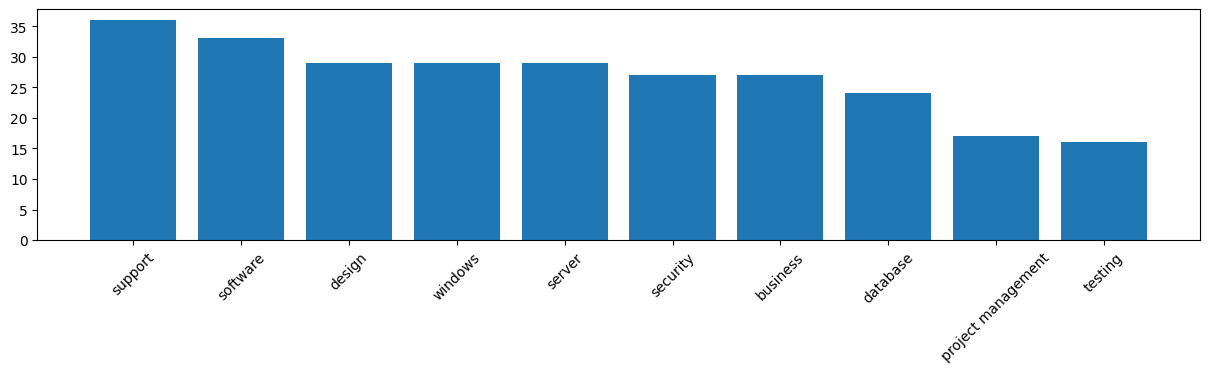

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 3))
plt.xticks(rotation=45)

plt.bar(counting.keys(), counting.values())

## 6. Name Entity Recognition

In [27]:
from spacy import displacy

text = df_resume_it.Clean_resume.iloc[32]

In [28]:
doc = nlp(text)

In [29]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style='ent', options=options)

## 7. Let's load the PDF - add some realism

A sample resume from [here](https://ait.ac.th/wp-content/uploads/2021/12/chaky_resume.pdf). Thanks to chaky, we can have a sample resume with real name of person, organizations, institutes, etc. Most sample resumes distributed online have named entity masked and we cannot evaluate if our parsing method works well with NER or not.

In [30]:
from PyPDF2 import PdfReader

# reader = PdfReader("./data/Sample_Resume.pdf")
reader = PdfReader("./data/chaky_resume.pdf")
page = reader.pages[0]
text = page.extract_text()

In [31]:
text = preprocessing(text)

In [32]:
doc = nlp(text)

In [33]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style='ent', options=options)

## 8. Additional Features

In [81]:
from collections import defaultdict

def get_info(text, nlp=nlp):
    
    doc = nlp(text)
    
    info = defaultdict(list)
    
    for ent in doc.ents:
        info[ent.label_.split("|")[0]].append(ent.text)

    for k, v in info.items():
        info[k] = list(set(v))
            
    return info

In [82]:
resume_info = get_info(text)

In [83]:
def print_info(text, nlp=nlp):
    for k, v in get_info(text, nlp).items():
        print(f'{k}      \t{v}')

In [37]:
print_info(text)

PERSON      	['chaklam silpasuwanchai email', 'glucose ngernail', 'silpasuwanchai c. cheng', 'silpasuwanchai c. ren x. sex', 'di erence', 'sarcar s. jokinen j. oulasvirta a. wang z.', 'c. ren', 'jokinen j. sarcar s. oulasvirta', 'wang z. ren x.', 'silpasuwanchai c. ahmed m.h.h', 'peng c. ren x.']
SKILL      	['mobile', 'python', 'java', 'pytorch', 'springboot', 'deep learning', 'natural language processing', 'software engineering', 'testing', 'data structures', 'algorithms', 'segmentation', 'emotion', 'engineering', 'business', 'engineering', 'computer science', 'engineering', 'computer science', 'framework', 'design', 'interaction', 'framework']
QUANTITY      	['310 - 9191']
ORG      	['siriraj hospital •non', 'mahidol university •emotion', '•asian institute', 'pathumthani thailand', 'bangkok thailand faculty', '•kasetsart university', 'kochi japan', '•kochi university', 'kochi japan', '•asian institute technology', 'pathumthani thailand bachelor science computer']
DATE      	['januar

In [78]:
test = 'Bachelor of Civil Law'
get_info(test)

defaultdict(list, {'ORG': ['Bachelor of Civil Law']})

### Extract Education Degree and Certificates

The data was retrieved from [github gist](https://gist.github.com/cblanquera/21c925d1312e9a4de3c269be134f3a6c) in json format and transform to jsonl file with *converter.ipynb*

In [39]:
ruler2 = nlp.add_pipe("entity_ruler", "cert_ent")
ruler2.from_disk('data/certs.jsonl')
ruler3 = nlp.add_pipe("entity_ruler", "degree_ent")
ruler3.from_disk('data/degrees.jsonl')

In [40]:
test = 'Bachelor of Civil Law'
get_info(test)

defaultdict(list, {'ORG': ['Bachelor of Civil Law']})

The degree is caught in ner component before reaching degree_cert component.

In [41]:
del nlp
nlp = spacy.load('en_core_web_md')

ruler1 = nlp.add_pipe("entity_ruler", "degree_ent", before='ner')
ruler1.from_disk('data/degrees.jsonl')
ruler2 = nlp.add_pipe("entity_ruler", "cert_ent", before='ner')
ruler2.from_disk('data/certs.jsonl')
ruler3 = nlp.add_pipe("entity_ruler", "skill_ent", before='ner')
ruler3.from_disk('data/skills.jsonl')

# I add degree before skill because 'Computer Science' is also included in skills.jsonl
# To avoid skill_ent split a str like 'Bachelor of Science in Computer Science' which is supposed to be a degree as a whole
# cert_ent is placed before skill_ent for the same reason

In [42]:
pickle.dump(nlp, open('./parser/main_parser.pkl', 'wb'))

In [43]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'degree_ent',
 'cert_ent',
 'skill_ent',
 'ner']

In [85]:
test = 'Bachelor of Science in Computer Science'
get_info(test, nlp=nlp)

defaultdict(list, {'DEGREE': ['Bachelor of Science in Computer Science']})

In [45]:
reader = PdfReader("./data/chaky_resume.pdf")
page = reader.pages[0]
text = page.extract_text()
print_info(text, nlp=nlp)

PERSON      	['Chaklam Silpasuwanchai', 'Niksirat', 'Cheng', 'Ren', 'Niksirat', 'Ren', 'Individual Di', 'Z.', 'Ren', 'Jokinen', 'Z.', 'Ren', 'CHI', 'Niksirat', 'Ahmed', 'M.H.H.', 'Peng', 'C.', 'Ren', 'CHI']
SKILL      	['Mobile', 'Python', 'Java', 'PyTorch', 'SpringBoot', 'Deep Learning', 'Natural Language Processing', 'Software Engineering', 'Testing', 'Algorithms', 'segmentation', 'emotion', 'Engineering', 'Business', 'Google', 'Framework', 'Interaction', 'Framework']
ORG      	['Machine/', 'Data\nStructures', 'SCG', 'Siriraj Hospital', '•Non-Invasive Blood Glucose Measuring', 'Mahidol University', 'Robotic Premium', 'Institute of Technology Pathumthani', 'School of', 'International University Bangkok', 'Thailand\nFaculty', 'Faculty of', '•Kasetsart University', 'Department of Statistics', 'University of Technology Kochi', 'Education\n•Kochi University of Technology Kochi', 'GPA', '•Asian Institute of Technology Pathumthani', 'GPA', '•Sirindhorn International Institute of Technology 

In [46]:
get_info(text, nlp=nlp)['DEGREE']

['Doctor of Engineering in Computer Science',
 'Master of Engineering in Computer Science',
 'Bachelor of Science in Computer Science']

In [47]:
get_info(text, nlp=nlp)['CERT']

[]

### Extract Work Experience

In [48]:
get_info(text, nlp=nlp)['ORG']

['Machine/',
 'Data\nStructures',
 'SCG',
 'Siriraj Hospital',
 '•Non-Invasive Blood Glucose Measuring',
 'Mahidol University',
 'Robotic Premium',
 'Institute of Technology Pathumthani',
 'School of',
 'International University Bangkok',
 'Thailand\nFaculty',
 'Faculty of',
 '•Kasetsart University',
 'Department of Statistics',
 'University of Technology Kochi',
 'Education\n•Kochi University of Technology Kochi',
 'GPA',
 '•Asian Institute of Technology Pathumthani',
 'GPA',
 '•Sirindhorn International Institute of Technology Pathumthani',
 'GPA',
 'Computer-Human',
 'S., Jokinen',
 'J., Oulasvirta, A.',
 'Wang',
 'J., Sarcar',
 'S., Oulasvirta, A.',
 'Wang']

In [49]:
# keywords for filtering workplace
# can't detect abriviated name like SCG

keywords = ['bureau', 'company', 'subsidiary', 'society', 'firm', 'association', 'school', 
            'trust', 'division', 'group', 'council', 'bank', 'team', 'center', 'organization', 
            'network', 'hospital', 'corporation', 'agency', 'commission', 'university', 'clinic', 
            'academy', 'office', 'institution', 'college', 'committee', 'institute', 
            'partnership', 'union', 'facility', 'laboratory', 'coalition', 'branch', 'service', 
            'enterprise', 'foundation', 'consortium', 'practice', 'department', 'studio', 'lab', 
            'board']

In [50]:
print(list(set(keywords)))

['division', 'union', 'studio', 'lab', 'facility', 'enterprise', 'laboratory', 'society', 'clinic', 'board', 'academy', 'commission', 'center', 'partnership', 'practice', 'university', 'consortium', 'agency', 'college', 'school', 'bank', 'company', 'organization', 'hospital', 'group', 'firm', 'committee', 'association', 'department', 'subsidiary', 'institute', 'trust', 'service', 'foundation', 'corporation', 'institution', 'office', 'coalition', 'team', 'bureau', 'network', 'council', 'branch']


In [51]:
filtered = [i for i in get_info(text, nlp=nlp)['ORG'] if any(keyword in i.lower() for keyword in keywords)]
filtered

['Siriraj Hospital',
 'Mahidol University',
 'Institute of Technology Pathumthani',
 'School of',
 'International University Bangkok',
 '•Kasetsart University',
 'Department of Statistics',
 'University of Technology Kochi',
 'Education\n•Kochi University of Technology Kochi',
 '•Asian Institute of Technology Pathumthani',
 '•Sirindhorn International Institute of Technology Pathumthani']

In [52]:
reader = PdfReader("./data/data_Ex/ACCOUNTANT/12802330.pdf")
page = reader.pages[0]
text = page.extract_text()

In [53]:
print_info(text, nlp=nlp)

GPE      	['Peachtree', 'Essbase']
SKILL      	['Accounting', 'Crystal', 'MS Office', 'Accounting', 'Database', 'Trend Analysis', 'accounting', 'business process', 'accounting', 'accounting', 'support', 'accounting', 'accounting', 'testing', 'accounting', 'support', 'support', 'support', 'business', 'testing']
ORG      	['Financial Reporting', 'FAR', 'WAWF', 'Great Plains', 'Hyperion Workspace, Planning, Enterprise', 'Develop', 'State', 'Federal and State']
CARDINAL      	['90']
PRODUCT      	['Excel']
DATE      	['November 2011', 'daily', 'daily', 'monthly', 'September 2006', 'October 2011']


### Extract Contact Informations

#### Phone Number

In [54]:
import spacy

phone_number_extractor = spacy.blank('en')

In [55]:
ruler = phone_number_extractor.add_pipe('entity_ruler', 'phone_number_ent')

In [56]:
patterns = [
    {"label": "PHONE NUMBER", "pattern": [{"TEXT": {"REGEX": r"\+\d{11}"}}]},                               # 66123456789
    {"label": "PHONE NUMBER", "pattern": [{"TEXT": {"REGEX": r"\+\d{2}"}}, 
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{2}"}},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{3}"}},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{4}"}}]},          # +66-12-345-6789
    {"label": "PHONE NUMBER", "pattern": [{"ORTH": "(", "OP": "?"}, {"TEXT": {"REGEX": r"\+\d{2}"}}, {"ORTH": ")", "OP": "?"},
                                        {"TEXT": {"REGEX": r"\d{2}"}},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{3}"}},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{4}"}}]},          # (+66)12 345 6789
    {"label": "PHONE NUMBER", "pattern": [{"ORTH": "(", "OP": "?"}, {"TEXT": {"REGEX": r"\+\d{2}"}}, {"ORTH": ")", "OP": "?"},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{2}"}},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{3}"}},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{4}"}}]},          # (+66) 12 345 6789
    {"label": "PHONE NUMBER", "pattern": [{"TEXT": {"REGEX": r"\d{10}"}}]},                                 # 0123456789
    {"label": "PHONE NUMBER", "pattern": [{"TEXT": {"REGEX": r"\d{3}"}},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{3}"}},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{4}"}}]},          # 012-345-6789
    {"label": "PHONE NUMBER", "pattern": [{"ORTH": "(", "OP": "?"}, {"TEXT": {"REGEX": r"\d{2}"}}, {"ORTH": ")", "OP": "?"},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{2}"}},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{3}"}},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{4}"}}]},          # (66) 12 345 6789
    {"label": "PHONE NUMBER", "pattern": [{"ORTH": "(", "OP": "?"}, {"TEXT": {"REGEX": r"\d{2}"}}, {"ORTH": ")", "OP": "?"},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{3}"}},
                                        {"ORTH": "-", "OP": "?"}, {"TEXT": {"REGEX": r"\d{4}"}}]}           # (012) 345 6789
]
# I hate regex

ruler.add_patterns(patterns)

In [57]:
text

"LEAD ACCOUNTANT\nHighlights\nQuickBooks, Peachtree, In-house Accounting Systems and Financial Reporting, MAS 90, FAR, WAWF, Great Plains, Integration\nManager, FRx reporting.\nHyperion Workspace, Planning, Enterprise, Essbase, Schedules and Reports, Crystal Reports, MS Office with strong Excel skill\nFinancial Accounting\nDatabase Management\nBudget Administration\nPerformance Reporting\nTax Preparation and Compliance\nForecasting/Trend Analysis\nStrategic Planning\nCash-Flow Analysis\nVariance Analysis\nSarbanes-Oxley Research and Compliance\nExperience\nLead Accountant\n \nNovember 2011\n \nto \nCurrent\n \nCompany Name\n \nï¼\u200b \nCity\n \n, \nState\nExperience in various areas including, but not limited to: operating budgets, financial analysis/planning, financial statements and reporting,\naccounting policies and procedure, cash flow, taxes, auditing, and business process improvements.\nManage various areas in financial accounting, budgeting and financial analysis.\nExecute qu

In [58]:
phone_number_extractor.pipe_names

['phone_number_ent']

In [59]:
test = '+66-12-345-6789'

In [60]:
get_info(test, nlp=phone_number_extractor)

defaultdict(list, {'PHONE NUMBER': ['+66-12-345-6789']})

In [61]:
test = '+66 12 345 6789'
get_info(test, nlp=phone_number_extractor)

defaultdict(list, {'PHONE NUMBER': ['+66 12 345 6789']})

In [62]:
test = '(012) 345 6789'

In [63]:
get_info(test, nlp=phone_number_extractor)

defaultdict(list, {'PHONE NUMBER': ['(012) 345 6789']})

In [64]:
reader = PdfReader("./data/chaky_resume.pdf")
page = reader.pages[0]
text = page.extract_text()

In [65]:
text[60:100]

'am.com Mobile : +66-63-310-9191\nhttp://g'

In [66]:
get_info(text, nlp=phone_number_extractor)['PHONE NUMBER']
# finally

['+66-63-310-9191']

In [67]:
pickle.dump(phone_number_extractor, open('./parser/phone_number_parser.pkl', 'wb'))

#### Email

In [68]:
from spacy.matcher import Matcher

In [69]:
email_extractor = spacy.load("en_core_web_md")

In [70]:
matcher = Matcher(email_extractor.vocab)

In [71]:
pattern = [{"LIKE_EMAIL": True}]
matcher.add("EMAIL", [pattern])

doc = email_extractor("'Chaklam Silpasuwanchai Email : chaklam@ait.asia\nhttp://chaklam.com Mobile ")
matches = matcher(doc)

In [72]:
for _, start, end in matches:
    span = doc[start:end]
    print(span.text)

chaklam@ait.asia


In [73]:
email_extractor = spacy.load("en_core_web_md")

def extract_email(text):
    emails = []
    matcher = Matcher(email_extractor.vocab)
    pattern = [{"LIKE_EMAIL": True}]
    matcher.add("EMAIL", [pattern])

    doc = email_extractor(text)
    matches = matcher(doc)
    
    for _, start, end in matches:
        span = doc[start:end]
        emails.append(span)
    return emails

In [74]:
text[:100]

'Chaklam Silpasuwanchai Email : chaklam@ait.asia\nhttp://chaklam.com Mobile : +66-63-310-9191\nhttp://g'

In [75]:
extract_email(text)

[chaklam@ait.asia]

In [76]:
pickle.dump(email_extractor, open('./parser/en_core_web_md.pkl', 'wb'))